In [18]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
# Read data
# ==============================================================================
df = pd.read_csv('Data/spain/spain_clean.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(keys = 'datetime', inplace=True)
df = df.asfreq('60min')
df.head()

,wave_height,period
datetime,,
2023-06-15 00:00:00,0.58,4.85
2023-06-15 01:00:00,0.57,4.85
2023-06-15 02:00:00,0.56,4.85
2023-06-15 03:00:00,0.55,4.85
2023-06-15 04:00:00,0.55,4.86


In [3]:
# Train-test split
# ==============================================================================
one_month = (-1)*30*24 # One month
two_months = (-1)*60*24 # Two months

end_train = one_month + two_months
end_val = one_month

df_train = df.iloc[:end_train].copy()
df_val = df.iloc[end_train:end_val].copy()
df_test = df.iloc[end_val:].copy()

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}  (n={len(df_train)})")
print(f"Validation dates : {df_val.index.min()} --- {df_val.index.max()}  (n={len(df_val)})")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}  (n={len(df_test)})")

Train dates      : 2023-06-15 00:00:00 --- 2024-03-24 23:00:00  (n=6816)
Validation dates : 2024-03-25 00:00:00 --- 2024-05-23 23:00:00  (n=1440)
Test dates       : 2024-05-24 00:00:00 --- 2024-06-22 23:00:00  (n=720)


## Exploration

In [15]:
df_fd = df.diff().dropna()

In [16]:
# Stationarity tests
# ==============================================================================
warnings.filterwarnings("ignore")

print('Test stationarity for original series')
print('-------------------------------------')
adfuller_result = adfuller(df['wave_height'])
kpss_result = kpss(df['wave_height'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest stationarity for differenced series, d=1')
print('-------------------------------------')
adfuller_result = adfuller(df_fd['wave_height'])
kpss_result = kpss(df_fd['wave_height'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

Test stationarity for original series
-------------------------------------
ADF Statistic: -7.433425356299192, p-value: 6.273296233203401e-11
KPSS Statistic: 1.0855701665093762, p-value: 0.01

Test stationarity for differenced series, d=1
-------------------------------------
ADF Statistic: -18.361680991210363, p-value: 2.2266302021992167e-30
KPSS Statistic: 0.006460140402142037, p-value: 0.1


Weirdly, the KPSS and ADF tests give contradictory results on the original series. While we reject the null of no stationarity in the ADF, we also reject the null hypothesis of stationarity in the KPSS test. When we take first differences, the result of the ADF holds (with even more significance), while the result of the KPSS flips: we can't reject the null of stationarity in the first differences. 

<Axes: title={'center': 'Differenced order 1'}, xlabel='datetime'>

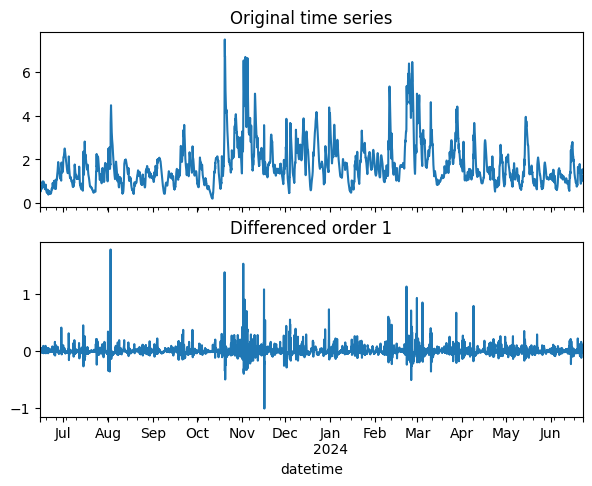

In [13]:
# Plot series
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), sharex=True)

df['wave_height'].plot(ax=axs[0], title='Original time series')
df_fd['wave_height'].plot(ax=axs[1], title='Differenced order 1')

plt.show()


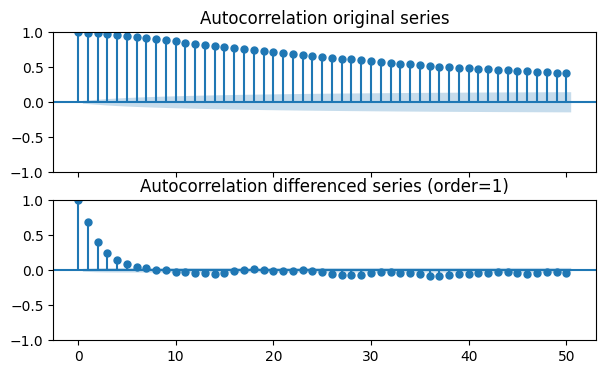

In [20]:
# Autocorrelation plot for original and differenced series
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(df['wave_height'], ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelation original series')
plot_acf(df_fd['wave_height'], ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelation differenced series (order=1)');   

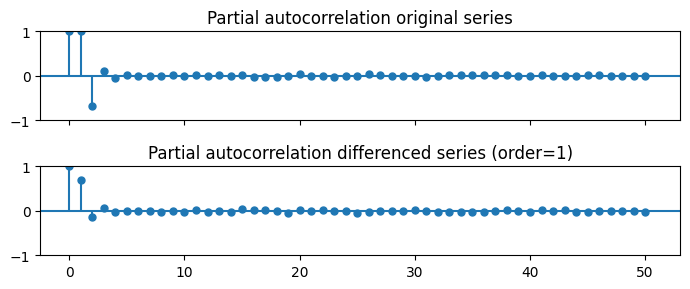

In [21]:
# Partial autocorrelation plot for original and differenced series
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 3), sharex=True)
plot_pacf(df['wave_height'], ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Partial autocorrelation original series')
plot_pacf(df_fd['wave_height'], ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Partial autocorrelation differenced series (order=1)');
plt.tight_layout();